### Part 2 Statistical Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time
import datetime
import math
import pandas as pd

In [5]:
cdc_20_21 = pd.read_csv(r'/mnt/d/OneDrive - University College London/T1/CASA0007/0. Research Project/cleaned_data/combined_df.csv', encoding = "UTF-8")

In [10]:
# show dataframe
#cdc_20_21
cdc_20_21_noloc = cdc_20_21.drop(columns=['Location'])

#### 2.1 Correaltions

In [11]:
cdc_20_21_noloc.corr()

,All teeth lost among adults aged >=65 years,Cervical cancer screening among adult women aged 21-65 years,"Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years",Mammography use among women aged 50-74 years,"Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening","Older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 years",Sleeping less than 7 hours among adults aged >=18 years,Visits to dentist or dental clinic among adults aged >=18 years,Any disability among adults aged >=18 years,Arthritis among adults aged >=18 years,...,Mental health not good for >=14 days among adults aged >=18 years,Mobility disability among adults aged >=18 years,No leisure-time physical activity among adults aged >=18 years,Obesity among adults aged >=18 years,Physical health not good for >=14 days among adults aged >=18 years,Self-care disability among adults aged >=18 years,Stroke among adults aged >=18 years,Taking medicine for high blood pressure control among adults aged >=18 years with high blood pressure,Vision disability among adults aged >=18 years,Visits to doctor for routine checkup within the past year among adults aged >=18 years
All teeth lost among adults aged >=65 years,1.000000,-0.517050,-0.353771,-0.328739,-0.478316,-0.543400,0.703226,-0.867729,0.906366,0.603527,...,0.834275,0.913054,0.859443,0.661821,0.928203,0.871257,0.848069,0.463675,0.837847,0.324814
Cervical cancer screening among adult women aged 21-65 years,-0.517050,1.000000,0.690926,0.647149,0.569368,0.612547,-0.234617,0.661407,-0.528512,-0.024640,...,-0.460392,-0.450565,-0.489151,-0.304888,-0.551696,-0.493694,-0.364223,0.102689,-0.526265,0.295852
"Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years",-0.353771,0.690926,1.000000,0.640471,0.632480,0.695847,-0.086132,0.508020,-0.360650,0.081533,...,-0.220791,-0.311817,-0.345787,-0.238464,-0.369755,-0.395511,-0.270730,0.160365,-0.433513,0.376985
Mammography use among women aged 50-74 years,-0.328739,0.647149,0.640471,1.000000,0.409420,0.606734,0.018861,0.405156,-0.361295,-0.078590,...,-0.262400,-0.272398,-0.207442,-0.083316,-0.385734,-0.256375,-0.211597,0.217628,-0.274025,0.482458
"Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening",-0.478316,0.569368,0.632480,0.409420,1.000000,0.679586,-0.308360,0.556814,-0.444842,-0.082682,...,-0.359074,-0.441894,-0.494479,-0.327707,-0.494424,-0.549246,-0.474416,-0.016576,-0.567042,0.179051
"Older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 years",-0.543400,0.612547,0.695847,0.606734,0.679586,1.000000,-0.315192,0.608192,-0.522545,-0.133820,...,-0.411923,-0.511807,-0.513240,-0.343083,-0.559323,-0.598072,-0.518416,-0.010073,-0.616995,0.212371
Sleeping less than 7 hours among adults aged >=18 years,0.703226,-0.234617,-0.086132,0.018861,-0.308360,-0.315192,1.000000,-0.658513,0.670546,0.506848,...,0.744478,0.710701,0.678242,0.578028,0.704035,0.645130,0.617595,0.497645,0.630544,0.466746
Visits to dentist or dental clinic among adults aged >=18 years,-0.867729,0.661407,0.508020,0.405156,0.556814,0.608192,-0.658513,1.000000,-0.857816,-0.406621,...,-0.745148,-0.845450,-0.833976,-0.608620,-0.855903,-0.841444,-0.749784,-0.359657,-0.845653,-0.145972
Any disability among adults aged >=18 years,0.906366,-0.528512,-0.360650,-0.361295,-0.444842,-0.522545,0.670546,-0.857816,1.000000,0.614428,...,0.839110,0.972324,0.870799,0.657720,0.944284,0.869917,0.838508,0.482962,0.843988,0.306928
Arthritis among adults aged >=18 years,0.603527,-0.024640,0.081533,-0.078590,-0.082682,-0.

Text(0.5, 1.0, 'Correlation Matrix')

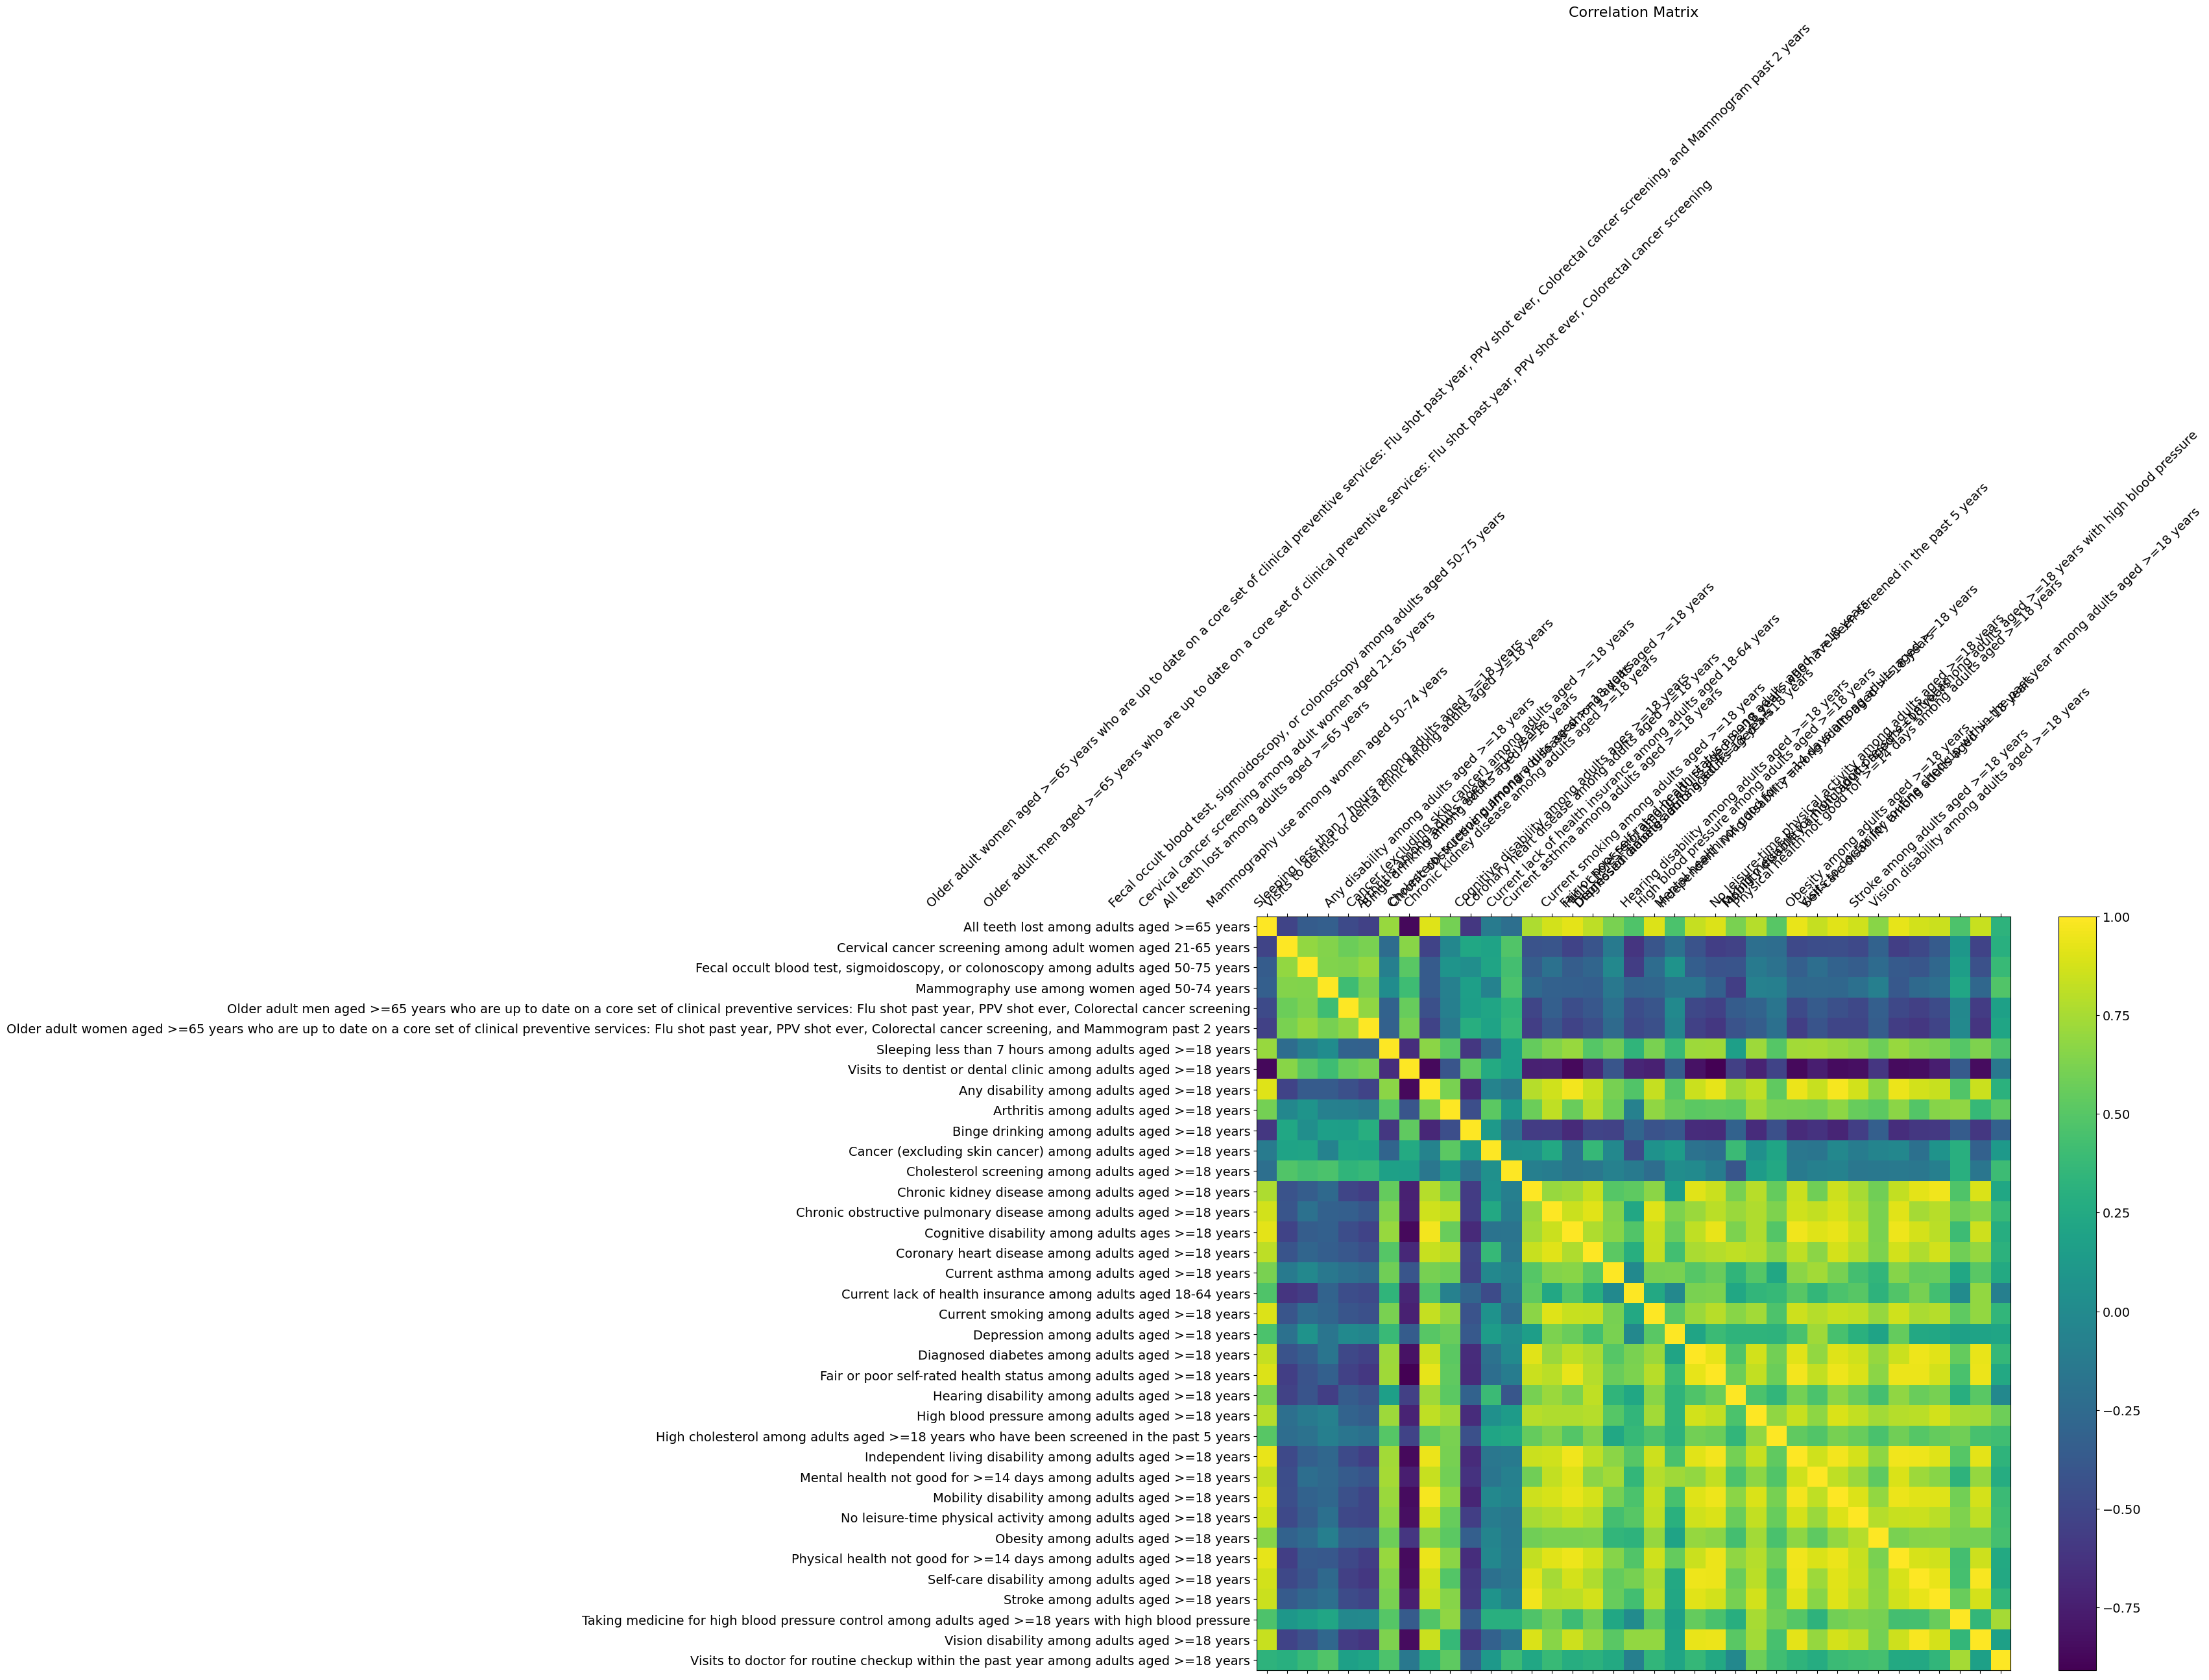

In [13]:
# create the figure set dimensions
f = plt.figure(figsize=(19, 15)) 

# matshow - creates matrix plot for df_office.corr(), fignum - assigned number for when there is multiple figures plotted
plt.matshow(cdc_20_21_noloc.corr(), fignum=f.number) 

# if you are using pandas 2.1, use the following code to replace the above line
# plt.matshow(df_office.corr(numeric_only=True), fignum=f.number)
plt.xticks(range(cdc_20_21_noloc.select_dtypes(['number']).shape[1]), cdc_20_21_noloc.select_dtypes(['number']).columns, fontsize=14, rotation=45) # add the x axis label
plt.yticks(range(cdc_20_21_noloc.select_dtypes(['number']).shape[1]), cdc_20_21_noloc.select_dtypes(['number']).columns, fontsize=14) # add the y axis label
# select_dtypes(['number']) - choose the numeric variables
cb = plt.colorbar() # add a legend to the right hand (default position)
cb.ax.tick_params(labelsize=14) # label size
plt.title('Correlation Matrix', fontsize=16) # add the title



#### 2.2 Summary Statistics: Mean, Median etc. 

#### 2.3 Feature Scaling:
Normalization or Standardization: Scale features so that they contribute equally to the distance computations in clustering (important for algorithms like K-Means).

#### 2.4 PCA or t-SNE

### Part 3 Clustering and Investigating Key Health Indicators 
This section is for performing the clustering analysis.


#### 3.0 Clustering Tendency Check
Hopkins Statistic: This test can be used to assess whether the data is significantly clustered or uniformly distributed. It’s a good practice to check if the data has a natural tendency to form clusters.


#### 3.1 K-Means
Key stat for k-Means:

Elbow Method, Silhouette Score

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(selected_columns_dbscan)
kmeans.labels_

#### 3.2 DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# Select the columns for clustering
selected_columns = citydf_cleaned[new_col_list]

# Create an instance of DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model to the selected columns
dbscan.fit(selected_columns)

#### 3.3 GMM

#### 3.4 Spectral Clustering